## Análise Fourier do Som

Notebook para a análise e visualização dos dados obtidos no experimento 3. Realizou-se uma FFT, utilizando a biblioteca numpy, e identificou-se a frequência fundamental e dois modos normais ($\omega_1$, $\omega_2$ e $\omega_3$).

In [3]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


In [118]:
from scipy.signal import find_peaks

In [6]:
import os
print(os.getcwd())

/Users/pedroalbuquerque/UFMG/2024.2/Experimental OOO


In [139]:
# Funcao para pegar os dados do documento
def dados_plot(file_path):
    sampling_rate, data = wavfile.read(file_path)
    # Cria eixo x do tempo
    duration = len(data) / sampling_rate
    time = np.linspace(0, duration, num=len(data))

    return sampling_rate, data, time
# Funcao para fazer a FFT e pegar os dados. Já normalizados e só a parte positiva.
def fft(data, sampling_data):
    # Utilizando a biblioteca do numpy faz a FFt
    fft_data = np.fft.fft(data)
    fft_freq = np.fft.fftfreq(len(data), 1/(sampling_rate))
    normalized_fft = fft_data / len(data) # Normalização dos dados da FFT
    # Pega os valores positivos
    half_length = len(fft_freq) // 2
    normalized_fft = normalized_fft[:half_length]
    fft_freq = fft_freq[:half_length]
    
    return np.abs(normalized_fft), fft_freq

### Tubo Retangular com Extremidade Aberta

In [107]:
file_retangular = 'professor-retarngular.wav'

In [108]:
sp_ret, data_ret = dados_plot(file_retangular)
fft_data_ret, fft_freq_ret = fft(data_ret, sp_ret)

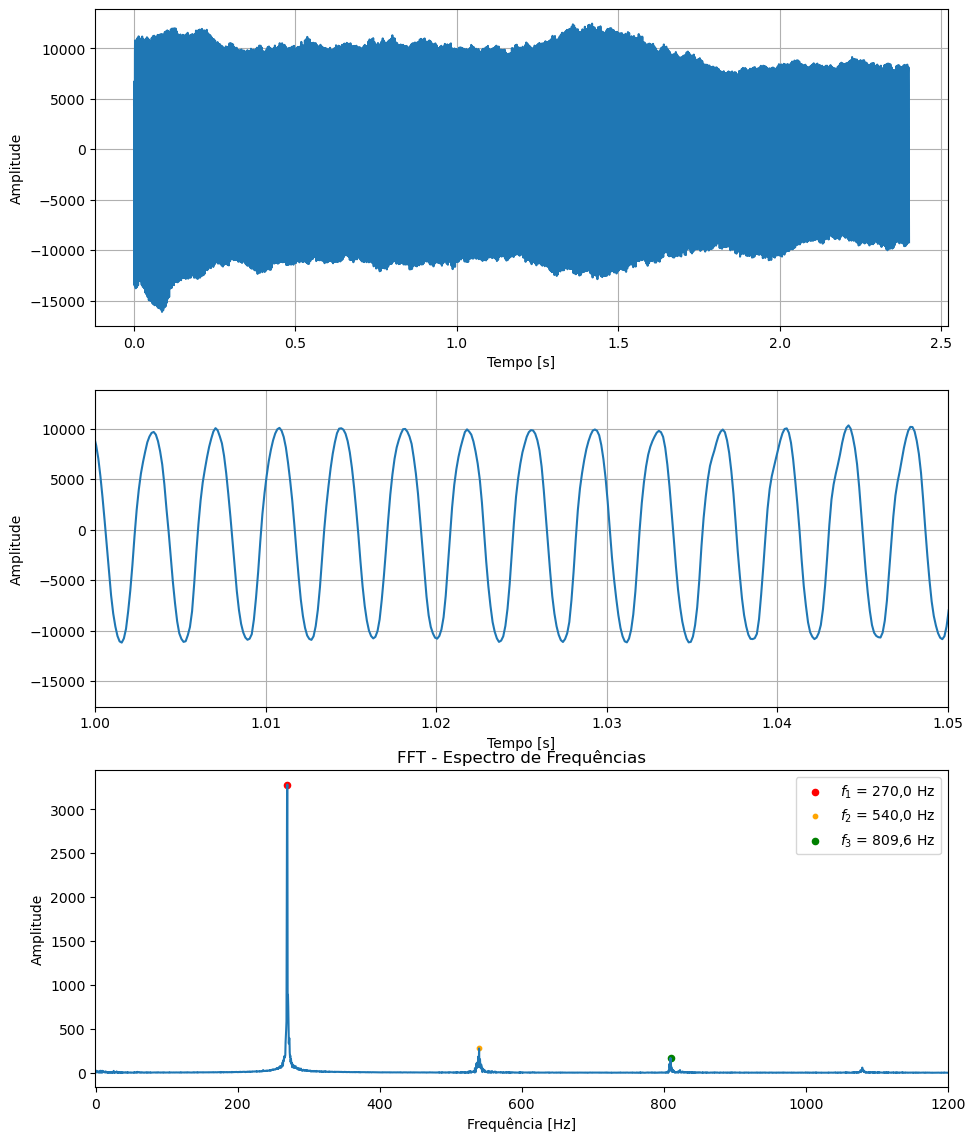

In [305]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (11,14))
ax1.plot(time_ret, data_ret)

ax1.grid()
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Amplitude')

ax2.plot(time_ret, data)
ax2.set_xlabel('Tempo [s]')
ax2.set_ylabel('Amplitude')
ax2.grid()
ax2.set_xlim(1.0, 1.05)


ax3.plot(fft_freq_ret, fft_data_ret)
ax3.set_title('FFT - Espectro de Frequências')
ax3.set_xlabel('Frequência [Hz]')
ax3.set_ylabel('Amplitude')

ax3.scatter(fft_freq_ret[648], fft_data_ret[648], color = 'red', label = r'$f_1$ = 270,0 Hz', s=20)


ax3.scatter(fft_freq_ret[1296], fft_data_ret[1296], color = 'orange', label = r'$f_2$ = 540,0 Hz', s=10)


ax3.scatter(fft_freq_ret[1943], fft_data_ret[1943], color = 'green', label = r'$f_3$ = 809,6 Hz', s=20)
ax3.legend()



ax3.set_xlim(-0.5, 1200)

plt.savefig('tubo_ret_aberto.png',  dpi=300, bbox_inches='tight')
plt.show()



A função peaks do scipy identifica os máximos da função de acordo com um determinado limiar (height). Assim, podemos identificar as frequências, uma vez que elas aparecem como esses picos nos gráficos.

In [291]:
peaks_ret, _ = find_peaks(fft_data_ret, height = 200)
print(peaks_ret)
print(f'$f_1$ = {fft_freq_ret[648]} Hz, $f_2$ = {fft_freq_ret[1296]} Hz, $f_3$ = {fft_freq_ret[1943]:.2f}Hz')

[ 648  650  654 1296]
$f_1$ = 270.0 Hz, $f_2$ = 540.0 Hz, $f_3$ = 809.58Hz


### Tubo Quadrado com Extremidade Aberta

In [238]:
file_quadrado_aberto = 'quadrado-aberto-1.wav'

In [239]:
sp_quad_aberto, data_quad_aberto, time_quad = dados_plot(file_quadrado_aberto)
fft_data_qaberto, fft_freq_qaberto = fft(data_quad_aberto, sp_quad_aberto)


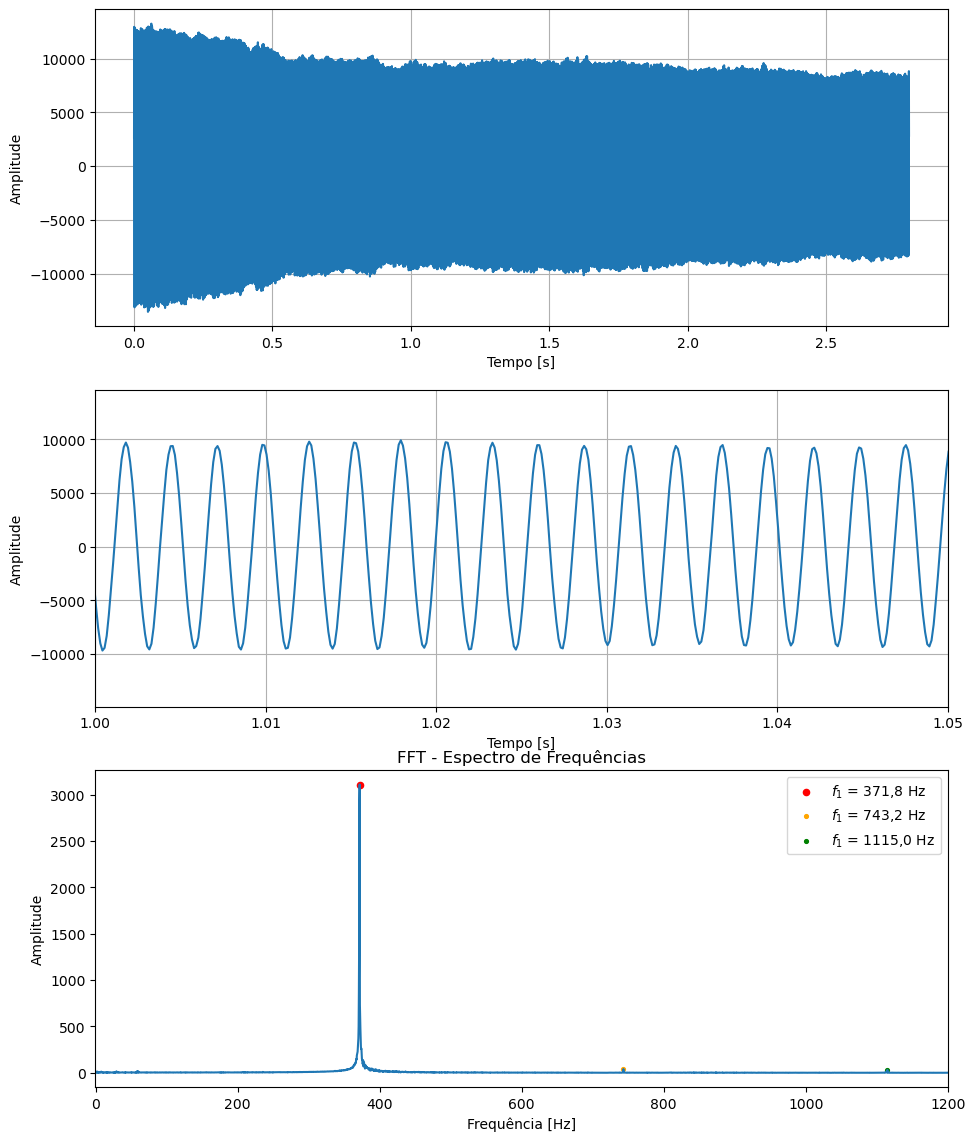

In [311]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (11,14))
ax1.plot(time_quad, data_quad_aberto)

ax1.grid()
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Amplitude')

ax2.plot(time_quad, data_quad_aberto)
ax2.set_xlabel('Tempo [s]')
ax2.set_ylabel('Amplitude')
ax2.grid()
ax2.set_xlim(1.0, 1.05)


ax3.plot(fft_freq_qaberto, fft_data_qaberto)
ax3.set_title('FFT - Espectro de Frequências')
ax3.set_xlabel('Frequência [Hz]')
ax3.set_ylabel('Amplitude')

ax3.scatter(fft_freq_qaberto[1041], fft_data_qaberto[1041], c = 'red', label = r'$f_1$ = 371,8 Hz', s=20)


ax3.scatter(fft_freq_qaberto[2081], fft_data_qaberto[2081], c = 'orange', label = r'$f_1$ = 743,2 Hz', s=7.5)


ax3.scatter(fft_freq_qaberto[3122], fft_data_qaberto[3122], c = 'green', label = r'$f_1$ = 1115,0 Hz', s=7.5)

ax3.legend()
ax3.set_xlim(-0.5, 1200)


plt.savefig('tubo_quadrado_aberto.png',  dpi=300, bbox_inches='tight')

plt.show()

In [299]:
peaks_quad_aberto, _ = find_peaks(fft_data_qaberto, height = 2000)
print(peaks_quad_aberto)
#print(f'$f_1$ = {fft_freq_ret[648]} Hz, $f_2$ = {fft_freq_ret[1293]} Hz, $f_3$ = {fft_freq_ret[1943]:.2f}Hz')

[1041]


In [256]:
fft_freq_qaberto[3122]

1114.9999999999998

In [250]:
fft_freq_qaberto[2081]

743.2142857142857

In [244]:
fft_freq_qaberto[1041]

371.7857142857142

### Tubo com Extremidade Quadrada Fechado

In [177]:
file_quadrado_fechado = 'quadrado-fechado-2.wav'

In [178]:
sp_quad_fechado, data_quad_fechado, time_quad_f = dados_plot(file_quadrado_fechado)
fft_data_qfechado, fft_freq_qfechado = fft(data_quad_fechado, sp_quad_fechado)


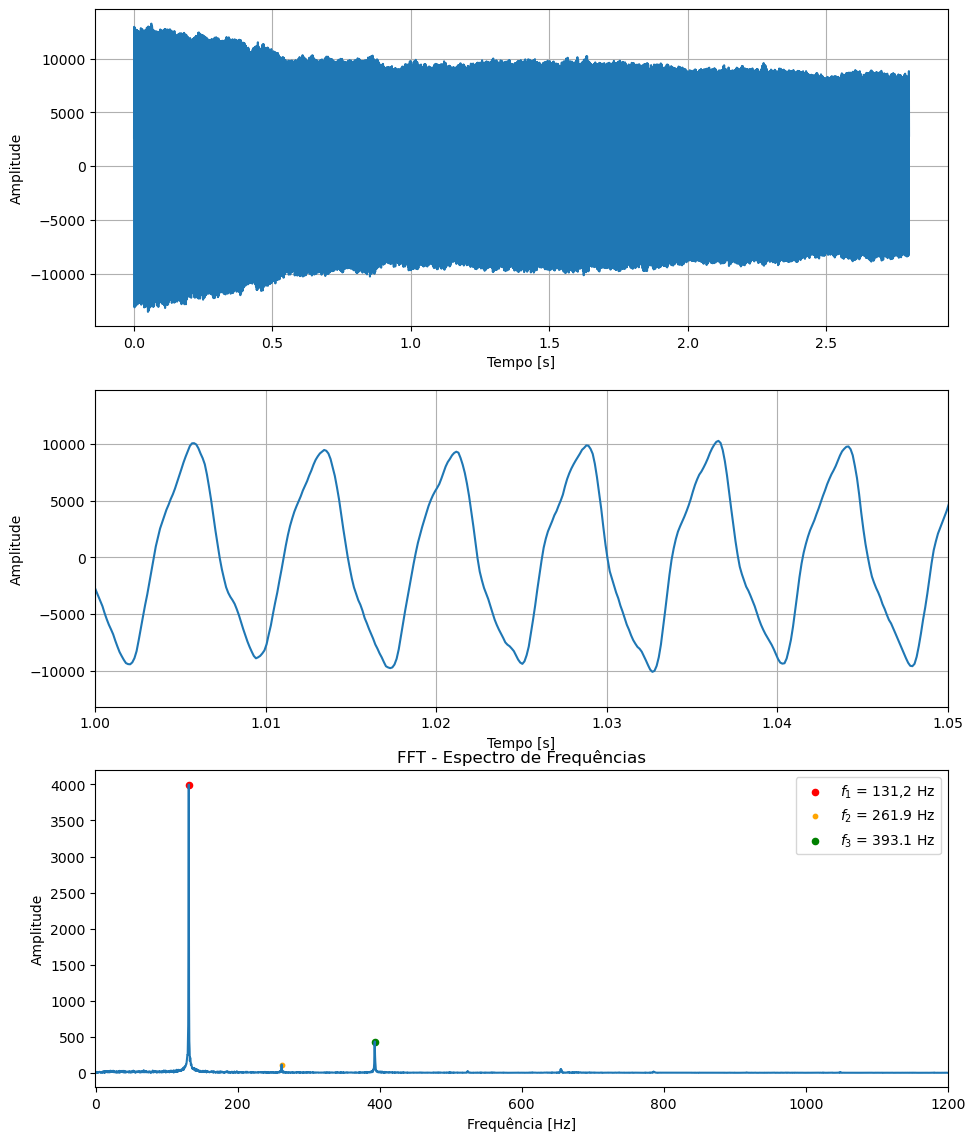

In [307]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (11,14))
ax1.plot(time_quad, data_quad_aberto)

ax1.grid()
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Amplitude')

ax2.plot(time_quad_f, data_quad_fechado)
ax2.set_xlabel('Tempo [s]')
ax2.set_ylabel('Amplitude')
ax2.grid()
ax2.set_xlim(1.0, 1.05)


ax3.plot(fft_freq_qfechado, fft_data_qfechado)
ax3.set_title('FFT - Espectro de Frequências')
ax3.set_xlabel('Frequência [Hz]')
ax3.set_ylabel('Amplitude')

ax3.scatter(fft_freq_qfechado[341], fft_data_qfechado[341], color = 'red', label = r'$f_1$ = 131,2 Hz', s=20)

ax3.scatter(fft_freq_qfechado[681], fft_data_qfechado[681], color = 'orange', label = r'$f_2$ = 261.9 Hz', s=10)

ax3.scatter(fft_freq_qfechado[1022], fft_data_qfechado[1022], color = 'green', label = r'$f_3$ = 393.1 Hz', s=20)

ax3.legend()



ax3.set_xlim(-0.5, 1200)


plt.savefig('tubo_quad_fechado.png',  dpi=300, bbox_inches='tight')
plt.show()




In [217]:
peaks_qfechado, _ = find_peaks(fft_data_qfechado, height = 410)
print(peaks_qfechado)
#print(f'$f_1$ = {fft_freq_ret[648]} Hz, $f_2$ = {fft_freq_ret[1293]} Hz, $f_3$ = {fft_freq_ret[1943]:.2f}Hz')

[ 341 1022]


In [210]:
print(f'f1 = {fft_freq_qfechado[341]:.2f}   f2= {fft_freq_qfechado[681]:.2f} f3 = {fft_freq_qfechado[1022]:.2f}')

f1 = 131.15   f2= 261.92 f3 = 393.08


### Tubo Longo com Extremidade Quadrada Aberta 

In [258]:
file_quadrado_longo_aberto = 'quadrado-longo-aberto.wav'

In [260]:
sp_quad_la, data_quad_la, time_quad_la = dados_plot(file_quadrado_longo_aberto)
fft_data_qla, fft_freq_qla = fft(data_quad_la, sp_quad_la)


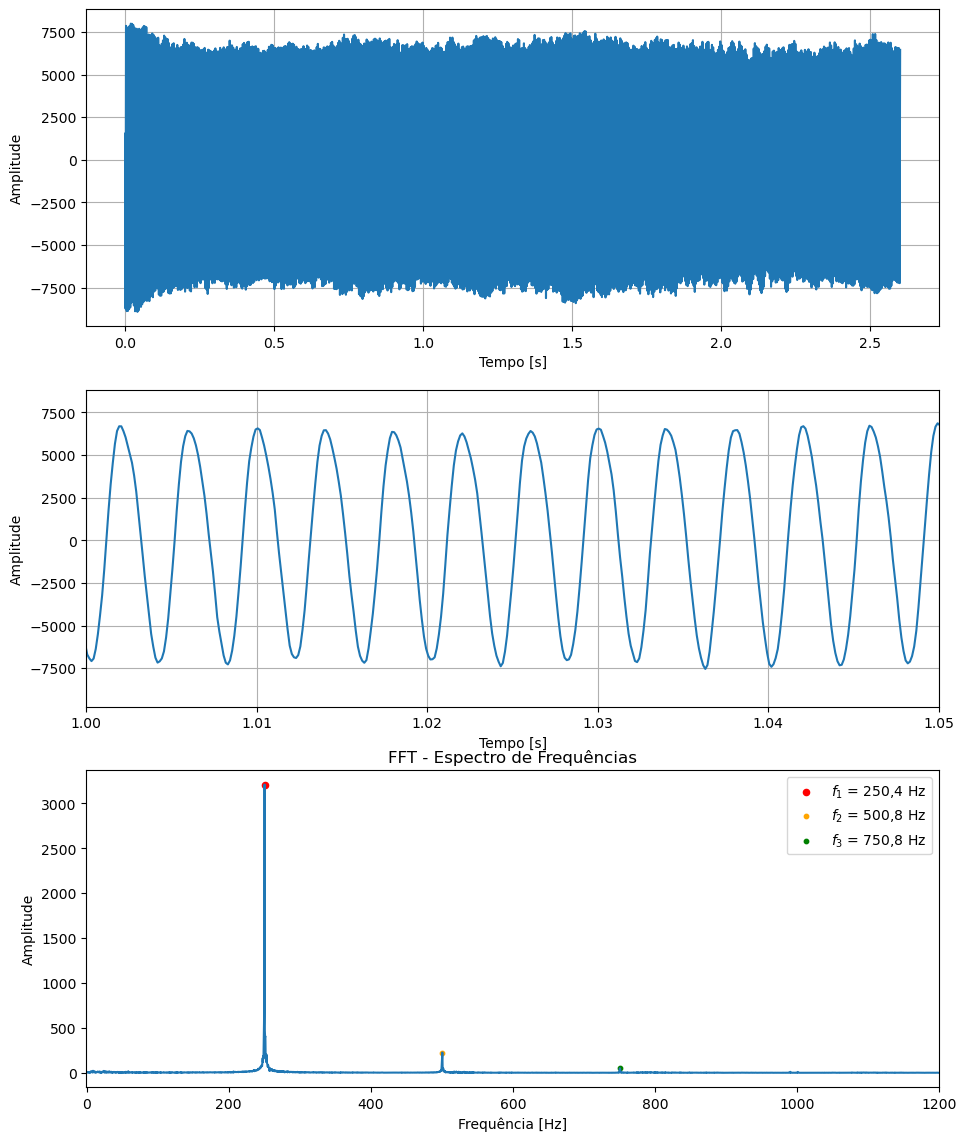

In [309]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (11,14))
ax1.plot(time_quad_la, data_quad_la)

ax1.grid()
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Amplitude')

ax2.plot(time_quad_la, data_quad_la)
ax2.set_xlabel('Tempo [s]')
ax2.set_ylabel('Amplitude')
ax2.grid()
ax2.set_xlim(1.0, 1.05)


ax3.plot(fft_freq_qla, fft_data_qla)
ax3.set_title('FFT - Espectro de Frequências')
ax3.set_xlabel('Frequência [Hz]')
ax3.set_ylabel('Amplitude')

ax3.scatter(fft_freq_qla[651], fft_data_qla[651], color = 'red', label = r'$f_1$ = 250,4 Hz', s=20)

ax3.scatter(fft_freq_qla[1302], fft_data_qla[1302], color = 'orange', label = r'$f_2$ = 500,8 Hz', s=10)

ax3.scatter(fft_freq_qla[1952], fft_data_qla[1952], color = 'green', label = r'$f_3$ = 750,8 Hz', s=10)

ax3.legend()

ax3.set_xlim(-0.5, 1200)


plt.savefig('tubo_longo_quad_aberta.png',  dpi=300, bbox_inches='tight')
plt.show()

plt.show()

In [270]:
peaks_quad_la, _ = find_peaks(fft_data_qla, height = 20)
print(peaks_quad_la)

[  23   62  605  607  611  613  615  618  622  626  628  631  636  639
  641  644  646  651  654  656  658  664  670  672  675  677  679  681
  684  686  688  690  696  706 1297 1302 1305 1307 1309 1952]


In [272]:
fft_freq_qla[651]

250.38461538461536

In [269]:
fft_freq_qla[1302]

500.7692307692307

In [271]:
fft_freq_qla[1952]

750.7692307692307

### Erro relativo

Cálculo do erro relativo com as frequências calculadas teoricamente. Essas frequências e a forma como foram calculadas estão descritas no relatório do experimento.

In [312]:
def erro_relativo(exp, teor):
    return (np.abs(exp - teor)/teor)*100

In [313]:
### Tubo Retangular:

f1_exp = fft_freq_ret[648]

f1_teor = 250.36

f2_exp = fft_freq_ret[1296]

f2_teor = 500.72

f3_exp = fft_freq_ret[1943]

f3_teor = 751.1

print(f'erro relativo: f1 = {erro_relativo(f1_exp, f1_teor)}%, f2 = {erro_relativo(f2_exp, f2_teor)}%, f3 = {erro_relativo(f3_exp, f3_teor)}%')

erro relativo: f1 = 7.844703626777434%, f2 = 7.844703626777434%, f3 = 7.7863577863577875%


In [314]:
### Tubo Quadrado com extremidade aberta:
f1_exp2 = fft_freq_qaberto[1041]

f1_teor2 = 406.56

f2_exp2 = fft_freq_qaberto[2081]

f2_teor2 = 813.12

f3_exp2 = fft_freq_qaberto[3122]

f3_teor2 = 1219.68

print(f'erro relativo: f1 = {erro_relativo(f1_exp2, f1_teor2)}%, f2 = {erro_relativo(f2_exp2, f2_teor2)}%, f3 = {erro_relativo(f3_exp2, f3_teor2)}%')

erro relativo: f1 = 8.553297351998667%, f2 = 8.597219879687419%, f3 = 8.582579037124514%


In [ ]:
print(f'f1 = {fft_freq_qfechado[341]:.2f}   f2= {fft_freq_qfechado[681]:.2f} f3 = {fft_freq_qfechado[1022]:.2f}')

In [317]:
### Tubo Quadrado Longo com extremidade fechada:
f1_exp3 = fft_freq_qfechado[341]

f1_teor3 = 129.21

f2_exp3 = fft_freq_qfechado[681]

f2_teor3 = 258.4

f3_exp3 = fft_freq_qfechado[1022]

f3_teor3 = 387.62

print(f'erro relativo: f1 = {erro_relativo(f1_exp3, f1_teor3)}%, f2 = {erro_relativo(f2_exp3, f2_teor3)}%, f3 = {erro_relativo(f3_exp3, f3_teor3)}%')

erro relativo: f1 = 1.5044084465955607%, f2 = 1.3634198618718765%, f3 = 1.407802248832112%


In [318]:
### Tubo Quadrado Longo com extremidade aberta:

f1_exp4 = fft_freq_qla[651]

f1_teor4 = 258.3

f2_exp4 = fft_freq_qla[1302]

f2_teor4 = 516.7

f3_exp4 = fft_freq_qla[1952]

f3_teor4 = 775.1

print(f'erro relativo: f1 = {erro_relativo(f1_exp4, f1_teor4)}%, f2 = {erro_relativo(f2_exp4, f2_teor4)}%, f3 = {erro_relativo(f3_exp4, f3_teor4)}%')

erro relativo: f1 = 3.0644152595372254%, f2 = 3.083175775260176%, f3 = 3.139049055704981%
